# Daily scooter rentals analysis.

- I work for a company that facilitates scooter-sharing.
- Using these systems, users can rent a scooter in one place and return it to another.
- Currently, there are hundreds of scooter programs around the world.
- I have data about scooter rentals over a two-year period.
### Goal of analysis.
- The goal will be to understand and predict daily scooter rentals using linear regression, and to provide a visualization that will help the business manager better understand certain findings from the analysis.

In [ ]:
# Importing appropriate Python libriries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Loading the CSV file into a dataframe.
df_scooter_sharing = pd.read_csv('http://bit.ly/scooter-rentals')

In [ ]:
# Calculation dimensions. List Columns & Data Types. 
df_scooter_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


### Adjusting the Notebook
### Сhanging column names to more meaningful and complete ones:
- “yr” to “year”
- “mnth” to “month”
- “hum” to “humidity_norm”
- “temp” to “temp_norm”
- “atemp” to “temp_felt_norm”
- “wind” to “wind_norm”
- “registered” to “rentals_registered”
- “unregistered” to “rentals_unregistered”

In [ ]:
# Rename a columns. Relist all the columns to confirm the changes above were completed successfully.
df_scooter_sharing = df_scooter_sharing.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity_norm', 'temp':'temp_norm', 'atemp':'temp_felt_norm', 'wind':'wind_norm', 'registered':'rentals_registered', 'unregistered':'rentals_unregistered'})
df_scooter_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    731 non-null    int64  
 1   date                  731 non-null    object 
 2   year                  731 non-null    int64  
 3   month                 731 non-null    int64  
 4   weekday               731 non-null    int64  
 5   workday               731 non-null    int64  
 6   season                731 non-null    int64  
 7   holiday               731 non-null    int64  
 8   temp_norm             731 non-null    float64
 9   temp_felt_norm        731 non-null    float64
 10  humidity_norm         731 non-null    float64
 11  wind_norm             731 non-null    float64
 12  rentals_unregistered  731 non-null    int64  
 13  rentals_registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [ ]:
# Preview the first 5 records in the dataset.
df_scooter_sharing.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


### Adjusting the Notebook
Replacing the numbers (1, 2, 3, 4) with the following season names in the "season field:

- 1 = “winter”
- 2 = “spring”
- 3 = “summer”
- 4 = “fall”

In [ ]:
# Changing the 'season' from a number to their actual name.
df_scooter_sharing['season'] = df_scooter_sharing['season'].replace([1, 2, 3, 4],
                                                    ['winter',
                                                     'spring',
                                                     'summer',
                                                     'fall'])
df_scooter_sharing['season'].head()

0    winter
1    winter
2    winter
3    winter
4    winter
Name: season, dtype: object

In [ ]:
# Creating a new column called "rentals_total" that sums registered and unregistered rentals.
df_scooter_sharing['rentals_total'] = df_scooter_sharing['rentals_unregistered'] + df_scooter_sharing['rentals_registered']
df_scooter_sharing.head()

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Generation Descriptive Stats.
df_scooter_sharing.describe()

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,0.683995,0.028728,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,0.465233,0.167155,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,1.000000,0.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,1.000000,0.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Adjusting the Notebook
Dropping rows where there are missing values ​​in the dataset.

In [ ]:
# Dropping the records with null values.
df_scooter_sharing_null = df_scooter_sharing.dropna()
df_scooter_sharing_null.isnull().sum()

ID                      0
date                    0
year                    0
month                   0
weekday                 0
workday                 0
season                  0
holiday                 0
temp_norm               0
temp_felt_norm          0
humidity_norm           0
wind_norm               0
rentals_unregistered    0
rentals_registered      0
rentals_total           0
dtype: int64


### Creating a pivot table (using Pandas) that has "year" and "season" as indices (in that order) and that calculates the sum, minimum, and maximum for the "rentals_total" columns.

In [ ]:
# Exploring data using pivot tables.
df_pivot = pd.pivot_table(df_scooter_sharing_null, index=['year', 'season'], values=['rentals_total'], aggfunc=[np.sum, np.min, np.max])
df_pivot

sum          amin          amax
            rentals_total rentals_total rentals_total
year season                                          
0    fall          326137           627          5511
     spring        347316           795          5805
     summer        419650          1115          6043
     winter        150000           431          3239
1    fall          515476            22          8555
     spring        571273          1027          8362
     summer        641479          4073          8714
     winter        321348           441          7836

### Creating a pivot table that has "year" and "month" as indices (in that order) and that sums and averages the "rentals_total". 

In [ ]:
# Exploring data using pivot tables.
df_pivot = pd.pivot_table(df_scooter_sharing_null, index=['year', 'month'], values=['rentals_total'], aggfunc=[np.sum, np.mean])
df_pivot

sum          mean
           rentals_total rentals_total
year month                            
0    1             38189   1231.903226
     2             48215   1721.964286
     3             64045   2065.967742
     4             94870   3162.333333
     5            135821   4381.322581
     6            143512   4783.733333
     7            141341   4559.387097
     8            136691   4409.387097
     9            127418   4247.266667
     10           123511   3984.225806
     11           102167   3405.566667
     12            87323   2816.870968
1    1             96744   3120.774194
     2            103137   3556.448276
     3            164875   5318.548387
     4            174224   5807.466667
     5            195865   6318.225806
     6            202830   6761.000000
     7            203607   6567.967742
     8            214503   6919.451613
     9            218573   7285.766667
     10           198841   6414.225806
     11           152664   5088.800000
     12           123713   3990.741935

# Visualization.

### 1. Histogram.
- A histogram to visualize the distribution of "rentals_total"  and is used seaborn's "displot".

**Conclusion.**
- The spread as well as the central tendency looks like the center is around 4500 or 5000 of the total number of rented scooters.

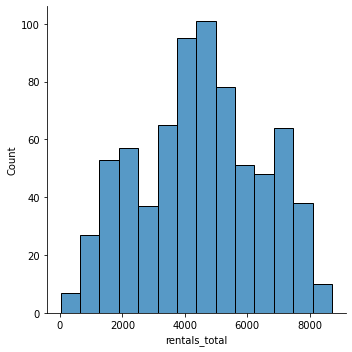

In [ ]:
# Show the distribution of rentals_total.
sns.displot(df_scooter_sharing_null, x="rentals_total")

### 2. Scatterplot.
-  has "rentals_unregistered" on the x-axis and "rentals_registered" on the y-axis.
- As a note, when “workday” is 0, it is a weekend – Saturday or Sunday.

**Conclusion.**
- Based on the scatterplot, it appears that we have more registered rentals on weekdays (Monday through Friday) and more unregistered rentals on weekends (Saturday and Sunday).

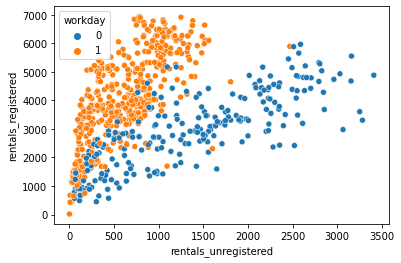

In [ ]:
# Generation a scatterplot that has "rentals_unregistered" on the x-axis and "rentals_registered" on the y-axis.
sns.scatterplot(x="rentals_unregistered", y="rentals_registered", hue = "workday", data = df_scooter_sharing_null)

### 3. Swarmplot.
-  Exploring the total rentals by season. 
-  The "season" is on the x-asis and "rentals_total" on the y-axis.
-  Using seaborn's "catplot" function.

**Conclusion.**
-  Based on the swarmplot, the lowest average daily rentals observed in winter.

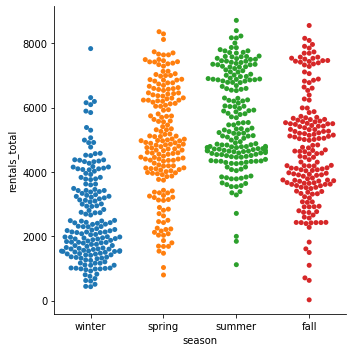

In [ ]:
# Generation a swarmplot to explore the total rentals by season.
sns.catplot(data = df_scooter_sharing_null, x="season", y="rentals_total", kind = "swarm")

### 4. Line plot.
-  Shows average daily rentals by month and split the lines by year.
-  The "month" is on the x-axis, the "rentals_total" on the y-axis, and there is a line for each value in the "year" column.
-  Using seaborn's "relplot" function.

**Conclusion.**
-  Based on the lineplot, the average daily rentals increased between the first year in the data ("year" = 0) and the second year ("year" = 1).

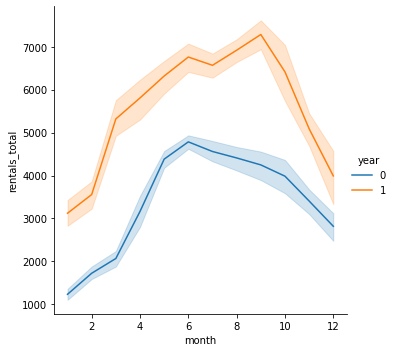

In [ ]:
# Generating a line plot that shows average daily rentals by month and split the lines by year.
sns.relplot(data = df_scooter_sharing_null, kind = "line", x = "month", y = "rentals_total", hue = "year",)

### 5. Pairplot.
-  showing the relationship between "rentals_total" and the weather indicators ("temp_norm", "temp_felt_norm", "humidity_norm", and "wind_norm"), which are continuous variables.  
- using seaborn's "pairplot" function and set the kind="kde".

**Conclusion.**

- Based on the pairplot, as "temp_norm" decreases, "rentals_total" tends to decrease.

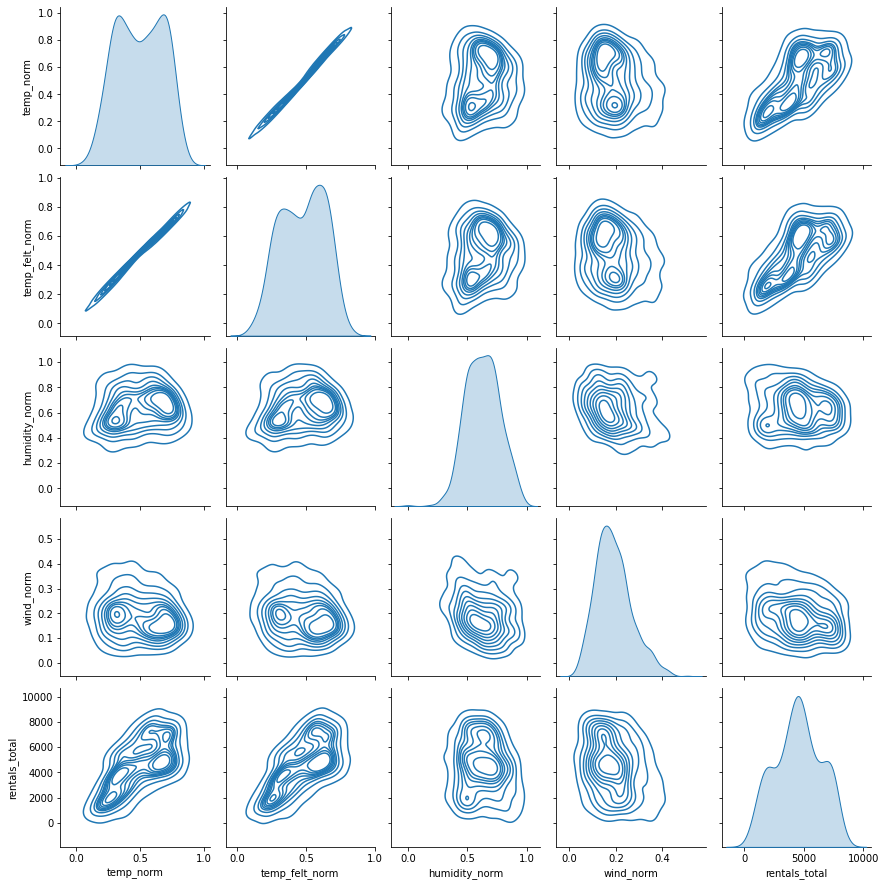

In [ ]:
# Generation a pairplot to show the relationship between "rentals_total" and the weather indicators ("temp_norm", "temp_felt_norm", "humidity_norm", and "wind_norm"), which are continuous variables.
sns.pairplot(df_scooter_sharing_null.iloc[:, [8,9,10,11,14]], kind = "kde");

### 6. Heatmap.
-  Visualization the correlation between "rentals_total" and the weather indicators.
-  Using seaborn's "heatmap" function.

**Conclusion.**


- By looking at the heatmap (or a correlation matrix), the correlation coefficient (r) that quantifies the strength of the relationship between "rentals_total" and "temp_norm" is 0.63.


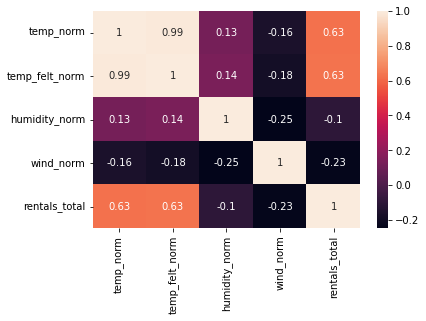

In [ ]:
# Generation a heatmap to visualize the correlation between "rentals_total" and the weather indicators mentioned in the previous question.
corr = df_scooter_sharing_null.iloc[:, [8,9,10,11,14]].corr()
sns.heatmap(corr, annot=True);

# Adjusting Notebook. Building a model to predict scooter rentals given temperatures.
- Separation the dependent variable (use "rentals_total") and the independent variable (use "temp_norm").
- Splitting the data into training and test sets.  (Put 25% into the test set.)
- Training ("fit") the linear regression model using the training data.


In [ ]:
# Separating the dependent variable (use "rentals_total") and the independent variable (use "temp_norm").
X = df_scooter_sharing_null[['temp_norm']]
y = df_scooter_sharing_null['rentals_total']

In [ ]:
# Pull out some of the data (25%) and create a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Training the prediction model using the training data.
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [ ]:
# Display the y-intercept and coefficients of our regression model.
print(model.intercept_)
print(model.coef_)

1327.930810368468
[6463.96764523]


In [ ]:
# Prediction "rentals_total" for a specific scenario. Using your regression equation, predict "rentals_total" when "temp_norm" = 0.30.
new_X = [[0.30]]
model.predict(new_X)

array([3267.12110394])

In [ ]:
# Make predictions in the test data.
y_pred = model.predict(X_test.values)

In [ ]:
# Evaluate the performance of the model (r-squared).
metrics.r2_score(y_test, y_pred)

0.37540464616240443